In [ ]:
pip install numpy scikit-learn


In [ ]:
!pip install -U imbalanced-learn


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("/Users/shobhitdhanyakumardiggikar/Downloads/data 2.csv")

In [ ]:
df.info()

df.columns = df.columns.str.strip()

selected_features = [
    "Bankrupt?",
    "ROA(C) before interest and depreciation before interest",
    "Total debt/Total net worth",
    "Current Ratio",
    "Interest Coverage Ratio (Interest expense to EBIT)",
    "CFO to Assets",
    "Total Asset Turnover",
    "Net Income to Total Assets",
    "Inventory Turnover Rate (times)",
    "Current Liability to Assets",
    "Equity to Liability"
]

df = df[selected_features]

df.head()

### Selected Features and Their Descriptions

1. **ROA(C) before interest and depreciation before interest**
   - Measures profitability relative to the company's total assets before interest and depreciation. Indicates how efficiently a company is using its assets to generate earnings.

2. **Total debt/Total net worth**
   - The ratio of a company's total debt to its total net worth. It indicates the financial leverage of the company and the proportion of its funding that comes from debt.

3. **Current Ratio**
   - A liquidity ratio that measures a company's ability to pay short-term obligations. It's calculated as current assets divided by current liabilities.

4. **Interest Coverage Ratio (Interest expense to EBIT)**
   - A ratio used to determine how easily a company can pay interest expenses on its outstanding debt. It's calculated as earnings before interest and taxes (EBIT) divided by interest expenses.

5. **CFO to Assets**
   - Cash Flow from Operations to Total Assets ratio. It measures the efficiency of a company's operating activities in generating cash relative to its total assets.

6. **Total Asset Turnover**
   - Indicates how efficiently a company uses its assets to generate sales. It's calculated as sales divided by total assets.

7. **Net Income to Total Assets**
   - A measure of a company's profitability relative to its total assets. It's calculated as net income divided by total assets.

8. **Inventory Turnover Rate (times)**
   - Measures how often a company's inventory is sold and replaced over a period. It's calculated as cost of goods sold divided by average inventory.

9. **Current Liability to Assets**
   - The ratio of a company's current liabilities to its total assets. It indicates the proportion of a company's assets that are financed by short-term obligations.

10. **Equity to Liability**
    - A ratio comparing the total equity to the total liabilities of a company. Indicates the relative proportion of equity and debt used to finance the company's assets.


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

rows = len(df.columns) // 3
if len(df.columns) % 3:
    rows += 1

fig = make_subplots(rows=rows, cols=3, subplot_titles=df.columns)

for i, col in enumerate(df.columns):
    row = (i // 3) + 1
    col_num = (i % 3) + 1
    fig.add_trace(go.Box(y=df[col], name=col), row=row, col=col_num)

fig.update_layout(height=300*rows, title_text="Box Plots for All Features", showlegend=False)

fig.show()

In [ ]:
df['Bankrupt?'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Bankrupt?'] = y_resampled

In [ ]:
df_resampled['Bankrupt?'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

target = 'Bankrupt?'

X = df_resampled.drop(target, axis=1)
y = df_resampled[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Feature Importance

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)

coefficients = pd.DataFrame(log_reg.coef_[0], index=X_train.columns, columns=['Coefficient'])
top_20_features = coefficients.abs().sort_values(by='Coefficient', ascending=False).head(20)

plt.figure(figsize=(10, 8))
top_20_features['Coefficient'].plot(kind='barh')
plt.title('Top 20 Features in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

### Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, 30],       
    'min_samples_split': [2, 5, 10]  
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['Importance'])
top_20_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
top_20_features['Importance'].plot(kind='barh')
plt.title('Top 20 Features in Random Forest (with GridSearchCV)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

### XGBoost Feature Importance

In [ ]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [3, 6, 9],               
    'learning_rate': [0.01, 0.1, 0.2],    
    'subsample': [0.5, 0.7, 1]            
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
feature_importances = pd.DataFrame(best_xgb.feature_importances_, index=X_train.columns, columns=['Importance'])
top_20_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
top_20_features['Importance'].plot(kind='barh')
plt.title('Top 20 Features in XGBoost (with GridSearchCV)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.show()

### Ridge Feature Importance

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_scaled, y_train)

ridge_coefficients = pd.Series(ridge_cv.coef_, index=X_train.columns)
ridge_coefficients.sort_values().plot(kind='barh', figsize=(20, 20))
plt.title('Feature Importance in Ridge Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

### Elastic Net Feature Importance

In [ ]:
from sklearn.linear_model import ElasticNetCV

elastic_net_cv = ElasticNetCV(cv=5, random_state=0, max_iter=100000)
elastic_net_cv.fit(X_train_scaled, y_train)

elastic_net_coefficients = pd.Series(elastic_net_cv.coef_, index=X_train.columns)
elastic_net_coefficients.sort_values().plot(kind='barh', figsize=(20, 20))
plt.title('Feature Importance in Elastic Net')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

### Lasso Feature Importance

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, random_state=0, max_iter=100000)
lasso_cv.fit(X_train_scaled, y_train)

lasso_coefficients = pd.Series(lasso_cv.coef_, index=X_train.columns)
lasso_coefficients.sort_values().plot(kind='barh', figsize=(20, 20))
plt.title('Feature Importance in Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# DF_feature engineered

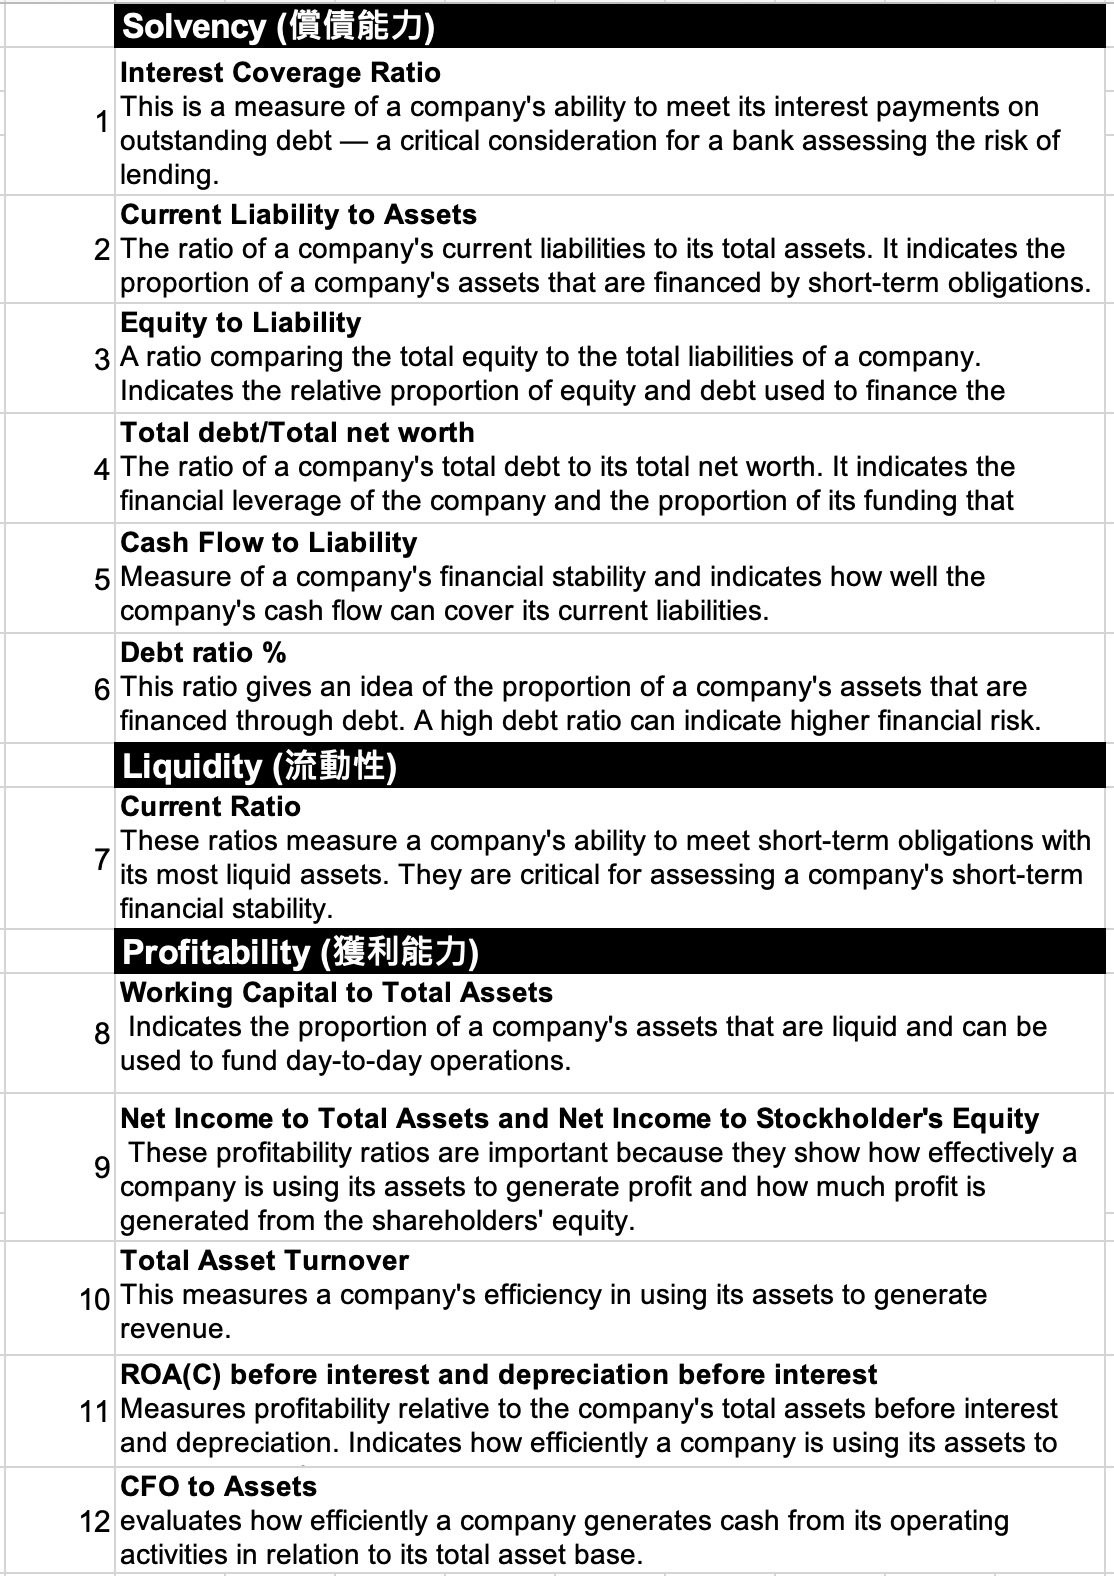

In [ ]:
df_resampled.columns = df_resampled.columns.str.strip()

columns_to_select = [
    'Bankrupt?',
    'Interest Coverage Ratio (Interest expense to EBIT)',
    'Current Liability to Assets',
    'Equity to Liability',
    'Total debt/Total net worth',
    'Cash Flow to Liability',
    'Debt ratio %',
    'Current Ratio',
    'Working Capital to Total Assets',
    'Net Income to Total Assets',
    'Net Income to Stockholder\'s Equity',
    'Total Asset Turnover',
    'CFO to Assets'
]

df_fe = df_resampled[columns_to_select]

In [ ]:
df_fe.info()

In [ ]:
target = 'Bankrupt?'

X = df_fe.drop(target, axis=1)
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score, classification_report

# Scailing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Train
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Prediction and Scores
y_pred_train = logistic_model.predict(X_train_scaled)
y_pred_test = logistic_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

train_accuracy, test_accuracy

In [ ]:
print(classification_rep)
print('ROC-AUC:', roc_auc)

In [ ]:
coefficients = pd.DataFrame(logistic_model.coef_[0], index=X_train.columns, columns=['Coefficient'])

sorted_coefficients = coefficients.abs().sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(sorted_coefficients.index, sorted_coefficients['Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", rf_grid_search.best_params_)
print("Accuracy:", rf_grid_search.best_score_)

In [ ]:
rf_best_model = rf_grid_search.best_estimator_

y_pred_test_rf = rf_best_model.predict(X_test_scaled)

classification_report_rf = classification_report(y_test, y_pred_test_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_test_rf)

print("classification report:\n", classification_report_rf)
print("ROC-AUC:", roc_auc_rf)

In [ ]:
feature_importances = rf_grid_search.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importance['Feature'], sorted_feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid_search = GridSearchCV(XGBClassifier(), xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", xgb_grid_search.best_params_)
print("Accuracy:", xgb_grid_search.best_score_)

In [ ]:
xgb_best_model = xgb_grid_search.best_estimator_

y_pred_test_xgb = xgb_best_model.predict(X_test_scaled)

classification_report_xgb = classification_report(y_test, y_pred_test_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_test_xgb)

print("classification report:\n", classification_report_xgb)
print("ROC-AUC:", roc_auc_xgb)

In [ ]:
feature_importances = xgb_grid_search.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importance['Feature'], sorted_feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()
plt.show()

# Ridge

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_scaled, y_train)

ridge_coefficients = pd.Series(ridge_cv.coef_, index=X_train.columns)
ridge_coefficients.sort_values().plot(kind='barh', figsize=(20, 20))
plt.title('Feature Importance in Ridge Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Elastic Net

In [ ]:
elastic_net_cv = ElasticNetCV(cv=5, random_state=0, max_iter=100000)
elastic_net_cv.fit(X_train_scaled, y_train)

elastic_net_coefficients = pd.Series(elastic_net_cv.coef_, index=X_train.columns)
elastic_net_coefficients.sort_values().plot(kind='barh', figsize=(20, 20))
plt.title('Feature Importance in Elastic Net')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Lasso

In [ ]:
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=100000)
lasso_cv.fit(X_train_scaled, y_train)

lasso_coefficients = pd.Series(lasso_cv.coef_, index=X_train.columns)
lasso_coefficients.sort_values().plot(kind='barh', figsize=(20, 20))
plt.title('Feature Importance in Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

    - After feature engineering, performance with all ML models are relatively good
    
    - Considering the above results, can 'Current Ratio' be deleted?

# Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns




In [ ]:
pip install scikit-learn

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_iris

# Load the Iris dataset
# iris = load_iris()
# X = df.drop('Bankrupt?')  # Features
# y = df['Bankrupt?']  # Target variable

X = df_fe.drop('Bankrupt?', axis=1)
y = df_fe['Bankrupt?']

target = 'Bankrupt?'

# X = df_resampled.drop(target, axis=1)
# y = df_resampled[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print other metrics, such as classification report and confusion matrix
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your features X and labels y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_scores = nb_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC-ROC
auc_roc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Assuming you have a feature matrix X and target variable y
# Replace X and y with your actual data
# X should be a 2D array or DataFrame of features, and y should be a 1D array or Series of labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print other metrics, such as classification report and confusion matrix
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


In [ ]:
print("Number of data points in training set:", len(X_train))
print("Number of data points in testing set:", len(X_test))


In [ ]:
print("Number of data points:", len(X))


In [ ]:
# Assuming you have a dataset with features X and labels y
# Replace 'your_data.csv' with the actual file path or method you're using to load the data

# Load your dataset
# You may need to adjust this based on your actual data loading method (e.g., pd.read_csv, np.loadtxt, etc.)
df = pd.read_csv('/Users/shobhitdhanyakumardiggikar/Downloads/data 2.csv')

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, and y_test should contain the appropriate number of data points
# Ensure that you are using these variables when training and testing your Naive Bayes model


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Assuming you have a feature matrix X and target variable y
# Replace X and y with your actual data
# X should be a 2D array or DataFrame of features, and y should be a 1D array or Series of labels

target = 'Bankrupt?'
X = df_fe.drop(target, axis=1)
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the performance of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print other metrics, such as classification report and confusion matrix
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


In [ ]:
target = 'Bankrupt?'

X = df_fe.drop(target, axis=1)
y = df_fe[target]

# KNN

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume you have a dataset with features (X) and corresponding labels (y)
# X should be a 2D array or DataFrame with your features
# y should be a 1D array or Series with your target labels
target = 'Bankrupt?'

X = df_fe.drop(target, axis=1)
y = df_fe[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) based on your dataset

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also print a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# You can also print other metrics, such as classification report and confusion matrix
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


# Hyperparameter tuning for KNN 

In [ ]:
print(X.shape, y.shape)

In [ ]:
print("Number of data points in training set:", len(X_train))
print("Number of data points in testing set:", len(X_test))

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'df_fe' with features and target variable 'Bankrupt?'
target = 'Bankrupt?'

# Extract features (X) and target variable (y)
X = df_fe.drop(target, axis=1)
y = df_fe[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can add more values to test
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_best_model, X_train_scaled, y_train, cv=5, n_jobs=-1)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (replace this with your own data loading)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model (replace parameters as needed)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Now you can use the trained model in cross-validation
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, n_jobs=-1)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


# ROC AUC

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_proba)

print(f'AUC-ROC Score: {auc_roc_score:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_proba)

print(f'AUC-ROC Score: {auc_roc_score:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# FInding the best value for the K neighbours

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for K
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search to find the best K
grid_search.fit(X_train, y_train)

# Get the best K value from the grid search
best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors (K): {best_k}")

# Initialize the KNN classifier with the best K
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the model with the best K
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the best K: {accuracy:.2f}")

# Print a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


# GBoosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Assuming 'df' is your DataFrame
target_column_name = 'Bankrupt?'  # Replace with the actual name of your target variable column

X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting stages to be used
    'learning_rate': [0.1, 0.01, 0.001],     # Step size shrinkage used in boosting
    'max_depth': [3, 4, 5],                 # Maximum depth of the individual trees
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Initialize the GradientBoostingClassifier with the best hyperparameters
clf = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                 learning_rate=best_params['learning_rate'],
                                 max_depth=best_params['max_depth'],
                                 random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Assuming 'df' is your DataFrame
target_column_name = 'Bankrupt?'  # Replace with the actual name of your target variable column

X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting stages to be used
    'learning_rate': [0.1, 0.01, 0.001],     # Step size shrinkage used in boosting
    'max_depth': [3, 4, 5],                 # Maximum depth of the individual trees
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Initialize the GradientBoostingClassifier with the best hyperparameters
clf = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                 learning_rate=best_params['learning_rate'],
                                 max_depth=best_params['max_depth'],
                                 random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

# Create a synthetic dataset for demonstration
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.70, random_state=0)

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

# Visualize the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.xlabel('Equity-to_Liability')
plt.ylabel('Debt_ratio')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'your_data' is your DataFrame
# Extract features from your DataFrame
X = df_fe.info()[['Equity-to_Liability', 'Debt_ratio']].values

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

# Visualize the clusters and cluster centers
plt.scatter(X[:, ], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.xlabel('Equity-to_Liability')
plt.ylabel('Debt_ratio')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# ... (previous code for KMeans clustering)

# Calculate silhouette scores
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Visualize silhouette scores
plt.figure(figsize=(8, 6))

# Plot silhouette scores for each sample
y_lower = 10
for i in range(4):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / 4)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)
plt.yticks([])  # Clear the y-axis labels/ticks
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient values")
plt.title("Silhouette Plot for K-means Clustering")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a synthetic dataset for demonstration
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.70, random_state=0)

# Initialize a range of values for k
k_values = range(1, 11)

# Inertia is the sum of squared distances of samples to their closest cluster center
inertia_values = []

# Calculate inertia for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have a DataFrame with features (X) and corresponding cluster labels (labels)
# Replace df with your actual DataFrame

# Create a synthetic dataset for demonstration
X, _ = make_blobs(n_samples=6819, centers=4, cluster_std=0.70, random_state=0)

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Create a DataFrame with features and cluster labels
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = labels

# Visualize pair plots for features across clusters
sns.pairplot(df, hue='Cluster', palette='viridis', markers=["o", "s", "D", "X"])
plt.suptitle('Pair Plots of Features Across Clusters', y=1.02)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

cm = metrics.confusion_matrix(y_test, y_pred, labels=tree_clf.classes_)

# Visualize the confusion matrix using ConfusionMatrixDisplay
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

# Show the plot
plt.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_classifier = GaussianNB()

# No hyperparameter tuning for Naive Bayes as it has minimal hyperparameters

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_proba_nb = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
auc_roc_score_nb = roc_auc_score(y_test, y_proba_nb)

print(f'Naive Bayes AUC-ROC Score: {auc_roc_score_nb:.4f}')

# Plot ROC curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

# AdaBoost with Decision Trees
adaboost_classifier = AdaBoostClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_adaboost_classifier = grid_search.best_estimator_

# Predict probabilities on the test set using the best model
y_proba_adaboost = best_adaboost_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score for AdaBoost
auc_roc_score_adaboost = roc_auc_score(y_test, y_proba_adaboost)

print(f'AdaBoost AUC-ROC Score: {auc_roc_score_adaboost:.4f}')

# Plot ROC curve for AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

# Plotting both ROC curves
plt.figure(figsize=(10, 6))

plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(auc_roc_score_nb))
plt.plot(fpr_adaboost, tpr_adaboost, color='green', lw=2, label='AdaBoost (AUC = {:.2f})'.format(auc_roc_score_adaboost))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gb_classifier = grid_search.best_estimator_

# Predict probabilities on the test set using the best model
y_proba_gb = best_gb_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score for Gradient Boosting
auc_roc_score_gb = roc_auc_score(y_test, y_proba_gb)

print(f'Gradient Boosting AUC-ROC Score: {auc_roc_score_gb:.4f}')

# Plot ROC curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

# Plotting ROC curves
plt.figure(figsize=(10, 6))

plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(auc_roc_score_gb))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Decision Tree
tree_classifier = DecisionTreeClassifier()

# Fit the model on the training data
tree_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_proba_tree = tree_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score for Decision Tree
auc_roc_score_tree = roc_auc_score(y_test, y_proba_tree)

print(f'Decision Tree AUC-ROC Score: {auc_roc_score_tree:.4f}')

# Plot ROC curve for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)

# Plotting ROC curve for Decision Tree
plt.figure(figsize=(8, 6))

plt.plot(fpr_tree, tpr_tree, color='purple', lw=2, label='Decision Tree (AUC = {:.2f})'.format(auc_roc_score_tree))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()
